In [1]:
# import numpy as np
from jax import numpy as np
from jax import jit
from numpy import random
import numpy as npo
from matplotlib import pyplot as plt

from tqdm.notebook import tqdm
import seaborn as sns
sns.set(font_scale=1.3, rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')

import scipy
def H(x):
    return 0.5 * scipy.special.erfc(x / np.sqrt(2))

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [3]:
def relu(x):
    return np.maximum(x,0)

# Frequency generator

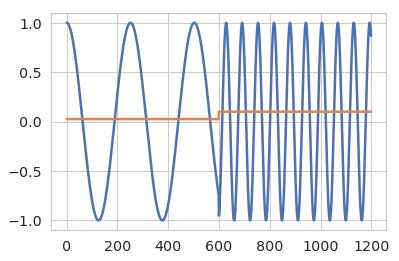

In [169]:
# Target function
T = 1200
a1 = 1/2*np.ones(T//2)
a2 = 2*np.ones(T//2)

a = np.concatenate([a1,a2]) / 20
y = np.cos(a*np.arange(T))
plt.plot(y)
plt.plot(a)

In [175]:
N = 1000
B = random.randn(N,N) / np.sqrt(N)
B,_ = np.linalg.qr(B)
B *= 0.25

# Feedback weights
Wfb = random.randn(N) / np.sqrt(N)

# Input weights
M = random.randn(N) / np.sqrt(N)

In [176]:
dt = 1e-1
x = random.randn(N)
x /= np.linalg.norm(x)
xs = []

for i in range(T):
    x += dt*(-x + np.tanh(B@x + M*a[i] + Wfb*y[i]))
    xs.append(x)
xs = np.stack(xs)

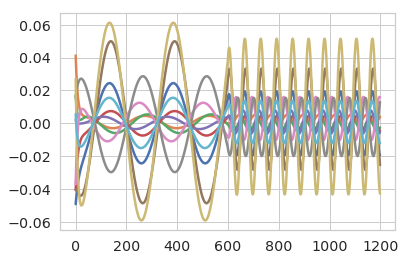

In [177]:
plt.plot(xs[:,:10]);

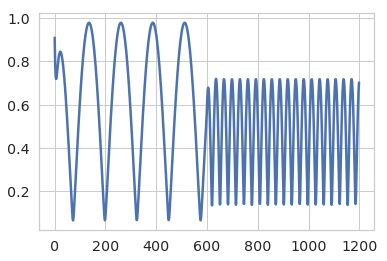

In [178]:
plt.plot(np.linalg.norm(xs, axis=-1))

In [179]:
lam = 100
w = npo.linalg.pinv(xs.T@xs + lam)@xs.T@y[:,None]
yhat = xs@w

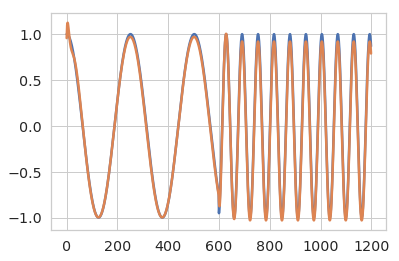

In [180]:
plt.plot(y)
plt.plot(yhat);

# Expander

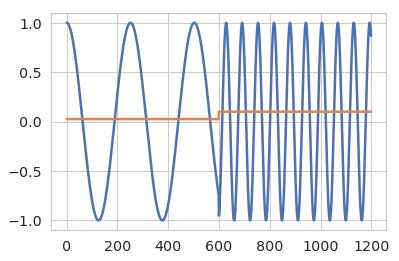

In [209]:
# Target function
T = 1200
a1 = 1/2*np.ones(T//2)
a2 = 2*np.ones(T//2)

a = np.concatenate([a1,a2]) / 20
y = np.cos(a*np.arange(T))
plt.plot(y)
plt.plot(a)

In [257]:
N = 200
M = 1000
J = random.randn(N,N) / np.sqrt(N)
J,_ = np.linalg.qr(J)

# Feedback weights
Win = random.randn(N) 

W = random.randn(M,N) / np.sqrt(N)

In [258]:
dt = 1e-1
x = random.randn(N)
x /= np.linalg.norm(x)
xs = []
zs = []
for i in range(T):
    x += dt*(-x + np.tanh(J@x + Win*y[i]))
    z = np.tanh(W@x)
    xs.append(x)
    zs.append(z)
xs = np.stack(xs)
zs = np.stack(zs)

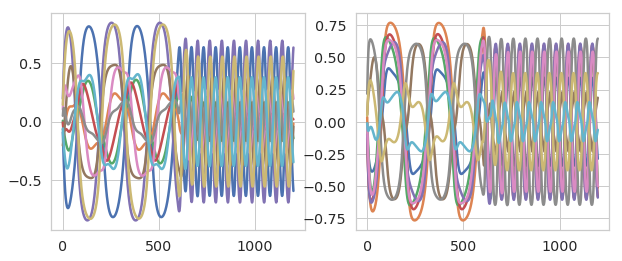

In [259]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(xs[:,:10]);
plt.subplot(122)
plt.plot(zs[:,:10]);

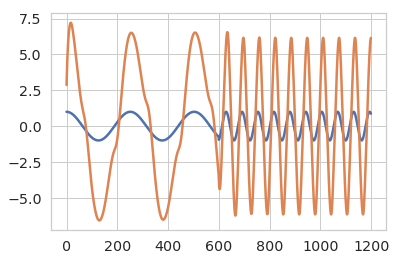

In [260]:
lam = 10
w = npo.linalg.pinv(xs.T@xs + lam)@xs.T@y[:,None]
yhat = xs@w

plt.plot(y)
plt.plot(yhat);

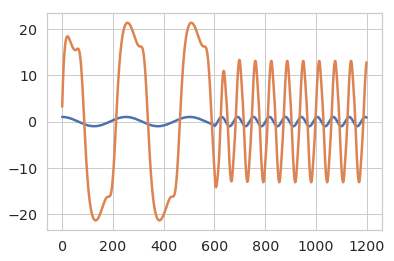

In [253]:
lam = 100
w = npo.linalg.pinv(zs.T@zs + lam)@zs.T@y[:,None]
yhat = zs@w

plt.plot(y)
plt.plot(yhat);

## Hebbian learning